# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [32]:
%matplotlib inline
import matplotlib.pylab as plt
#!pip install networkx
import networkx as nx   
import numpy as np
import pandas as pd
from collections import Counter
#!pip install netwulf
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

**Answer**

1) Social Networks: Nodes: persons, Links: friendship, sexual encounters, collaborations..

2) Transportation networks: Nodes: a city, an airport, a railway station..., Links: highways, streets, flight routes with the respective physical material being transported

3) Information networks: Nodes: Books, articles, blogs,...Links: citations, hyperlinks, recommendations

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

**Answer**

Social Networks (and Information and Communication Networks) within **social media** platforms

- E.g. consider twitter or facebook during US election campaigns 


**Why do I care about it**: With the recent Cambridge Analytica scandal, the dangers of strategically targeting "nodes" to sway voters was revealed and information control problems may emerge eventually threatening public political discourse and hence democracy. 

**Nodes**: "Users", such as persons(voters), politicians(candidates), third parties (bots, consultancies.. )

**Links**: a like, retweet, share, upvote, friends, follower..

**Size**: Extremely large..

**Mapping**: yes, depending on data availability, the tech giants' policy on api.. 




> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

**Answer**

- given the current Corona situation, transportation networks to follow the spread of a viruses may gain in relevance to predict future epidemics (cf. Chapter 1)
- given the imformation abundance we observe, social, information and communication networks will be important to understand for example the spread of misinformation and fake news.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

**Answer**

- a network is sparse if the number of links is smaller than the possible number of links (that would be present in a complete graph). 

- even a real network such as the WWW with millions of links connecting nodes, this is still a small fraction of the expected links if it was a complete network. 

- a real network where each node has ***many*** connections is still sparse as it would need to have ***all*** connections to all other remaining nodes to be non-sparse, i.e. complete. An example would be the friendships on facebooks as links to other users. Each user may have many friends, but no user has them all.

- I cannot really think of a complete real network. Maybe a couple that has only had sex with each other (links: sexual contact), node: two persons in the relationship. To be complete (non-sparse), this also entails self-loops ;-) Yet, the nodes don't quite have ***many*** conncetions here either. 

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [3]:
# https://networkx.github.io/documentation/stable/tutorial.html
#Graph G
G = nx.Graph()

In [4]:
#add some nodes and edges
G.add_node(1)

In [5]:
G.add_nodes_from([2,3])

In [6]:
G.add_edge(1,2) #add edge between 1 and 2

In [7]:
e = (3,4) #this also automatically produces node 4? Apparently
G.add_edge(*e)
G.add_edges_from([(5,6),(7,8),(7,4),(8,6),(2,6),(6,4),(4,8)]) # likewise

In [8]:
#print nodes
#G.number_of_nodes() #this prints number of nodes
list(G.nodes) # this prints the actual nodes

[1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
#print edges
#G.number_of_edges()
list(G.edges)

[(1, 2), (2, 6), (3, 4), (4, 7), (4, 6), (4, 8), (5, 6), (6, 8), (7, 8)]

In [10]:
#delete node
G.remove_node(1)
list(G.nodes) #check that node 1 is gone

[2, 3, 4, 5, 6, 7, 8]

/Users/qbj218/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


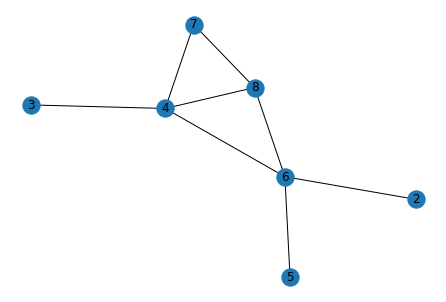

In [11]:
# draw
from networkx import drawing
nx.draw(G, with_labels=True)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

**Answer 5.1.2.1**

ER network is a random graph, also known as binomial graph. the number of nodes is fixed. For each node pair, you specify a probability that they are linked by edges. You create one by specifiying the number of nodes and the probability.



In [12]:
#5.1.2.1 ER networks are not scale-free networks but follow a binomial 
# distribution
# In ER networks, the number of nodes is fixed to a specified 
# integer number - static
# ER networks are random, the nodes connect with any other 
# node randomly given a specified probability.
# It is created by first specifying n nodes, e.g. 100 
# and p probability, e.g. 0.1
# For each node, it either is linked, or is not linked to 
# another node in a network,
# put differently, the presence of an edge/link between 
# any two nodes has fixed probabiliy and is 
# stat independent from any other link
# resulting in a binomial distribution in degrees


#5.1.2.2
from networkx import fast_gnp_random_graph
#from networkx import erdos_renyi_graph

#nx.erdos_renyi_graph(n=100,p=0.1)
ER =nx.fast_gnp_random_graph(n=100,p=0.1)

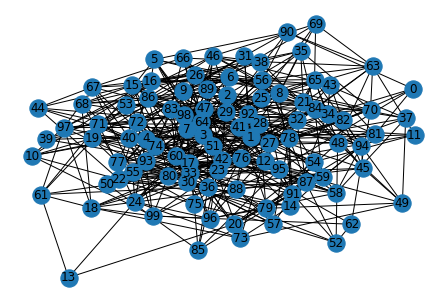

In [13]:
#5.1.2.3
#plot ER
nx.draw(ER, with_labels=True)

In [14]:
#5.1.2.4
# visualize degree distribution = percentage of nodes with a given degree k for the present range of k
# ki = row sum of adjacency matrix of node i
#theoretical distribution should follow binomial distribution

#follwoing the write up
from collections import Counter #for present degree distribution
from scipy.special import comb #for binomial theoretical distr

def compute_degree_distribution(network,p):
    N=network.number_of_nodes()
    #empirical distr
    degrees = sorted([d for n, d in network.degree()]) #each node degree
    counts = Counter(degrees) #count number of times each value of d appears
    degrees, counts = zip(*counts.items()) #extract info in two lists
    empirical_probs = [c/N for c in counts] #convert from counts to probs
    
    #compute theoretical distr
    theoretical_probs = [comb(N-1,k)*(p**k)*(1-p)**(N-1-k) for k in degrees]
    
    return degrees, empirical_probs, theoretical_probs


In [15]:
degr, probs, ther = compute_degree_distribution(ER,0.1)


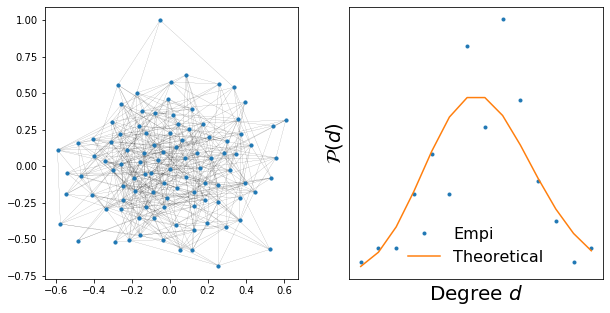

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
pos = nx.spring_layout(ER)
nx.draw_networkx_nodes(ER,pos,node_size=10,with_labels=False,ax=ax[0])
nx.draw_networkx_edges(ER,pos,alpha=0.9,width=0.1,ax=ax[0])

ax[1].plot(degr,probs,'.',label='Empi')#plot empirical distr we observe
ax[1].plot(degr, ther, label='Theoretical')#plot theoretocal binom distr
ax[1].set_xlabel('Degree $d$',fontsize=20)
ax[1].set_ylabel('$\mathcal{P}(d)$',fontsize=20)
ax[1].legend(frameon=False,fontsize=16)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

/Users/qbj218/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


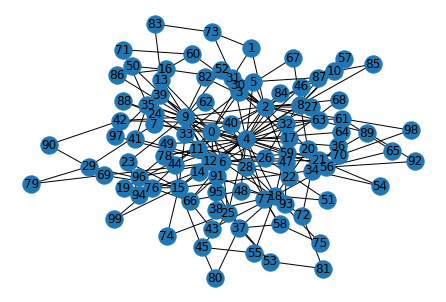

In [17]:
#4.1.3.2 BA networks are scale-free networks --> follow power law distribution
# that are expanded through the addition of new nodes
# in contrast to ER, the BA is not fixed in the number of nodes
# but grows in the number of nodes
# Preferential attachement: nodes tend to link to the more 
# connected nodes. In contrast to random networks such as ER, 
# where networks randomly choose interaction partners (only prob is specified)

# it is created by first specifying m nodes, e.g. 2 that are linked to each other 
#(at least one link to each node)
# at each timestep, one adds a new node with m links 
# and is more likely to connect to nodes with a higher degree, 
# i.e. with more connections
# older high degree nodes turn into hubs, attracting more new nodes,
# which increases their degree --> analogously to the rich get richer 



#4.1.3.2
BA=nx.barabasi_albert_graph(n=100,m=2)
#4.1.3.3
nx.draw(BA, with_labels=True)

In [18]:
#4.1.3.4 Degree Distribution
# Power law degree distribution


def compute_degree_distribution_BA(network,m):
    N=network.number_of_nodes()
    #empirical distr
    degrees = sorted([d for n, d in network.degree()]) #each node degree
    counts = Counter(degrees) #count number of times each value of d appears
    degrees, counts = zip(*counts.items()) #extract info in two lists
    empirical_probs = [c/N for c in counts] #convert from counts to probs
    
    #compute theoretical distr
    theoretical_probs = [(2*m*(m+1))/(k*(k+1)*(k+2)) for k in degrees]
    
    return degrees, empirical_probs, theoretical_probs



In [19]:
degr, probs, ther = compute_degree_distribution_BA(BA,2)



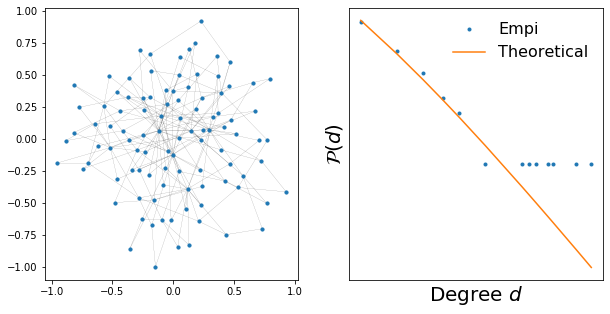

In [20]:
## with log axis

fig, ax = plt.subplots(1,2,figsize=(10,5))
pos = nx.spring_layout(BA)
nx.draw_networkx_nodes(BA,pos,node_size=10,with_labels=False,ax=ax[0])
nx.draw_networkx_edges(BA,pos,alpha=0.9,width=0.1,ax=ax[0])

ax[1].plot(degr,probs,'.',label='Empi')#plot empirical distr we observe
ax[1].plot(degr, ther, label='Theoretical')#plot theoretocal binom distr
ax[1].set_xlabel('Degree $d$',fontsize=20)
ax[1].set_ylabel('$\mathcal{P}(d)$',fontsize=20)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend(frameon=False,fontsize=16)

**4.1.3.5 Distribution differences ER and BA**

- edges in ER graph appear to be more evenly distributed, they fo not thin out in the outer areas, as can be observed in BA graph, where edges appear denser in the central part.

- BA follows a power law distribution, typical shape visible when plotting without log scales. But also with logged scales, the above observation can be clearly confirmed as it is most probable that a node has a very little degree. Probability decreases with increasing degree, i.e, there is only very few with many edges, and a lot of nodes with very little connections. 

- ER degree distribution follows a bell shaped curve that, most nodes have some "medium" degree, with few outliers on both sides. 

- in both graphs, ER and BA, the observed distribution does not follow the theoretical distribution as closely given the small sample size.

**4.1.3.6 Other measures**

- local clustering coefficient of nodes - expected lower in BA network



### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [2]:
data = pd.read_csv(
    "facebook-wall.txt.anon",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

NameError: name 'pd' is not defined

As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [3]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

NameError: name 'data' is not defined

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [23]:
from datetime import datetime as dt
print(dt.fromtimestamp(t0),dt.fromtimestamp(t1)) # look at dates in t0 and t1

def create_slice(data,t0,t1):
    if isinstance(t0,str):
        t0=dt.timestamp(dt.fromisoformat(t0))
    if isinstance(t1,str):
        t1=dt.timestamp(dt.fromisoformat(t1))
    slice = data.loc[data.timestamp.between(t0,t1)]
    slice= slice.groupby(['user1','user2']).size().reset_index(name='weight')
    return nx.from_pandas_edgelist(slice,'user1','user2','weight',create_using=nx.DiGraph)

DG= create_slice(data,'2008-01-23','2009-01-23')

2009-01-15 05:31:31 2009-01-22 05:31:31


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [24]:
def degree_distribution(degrees): #returns degree distribution 
    degrees = sorted([d for n, d in degrees]) #degree sequence
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    return degrees, counts


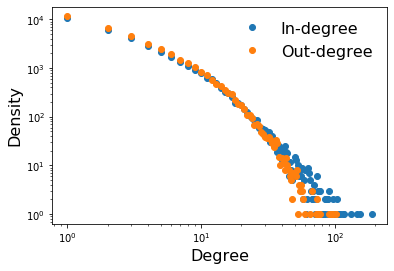

In [25]:
# compute and plot degree function using function above 
degin,cntin = degree_distribution(DG.in_degree())
degout,cntout = degree_distribution(DG.out_degree())

plt.plot(degin,cntin,'o',label='In-degree')
plt.plot(degout,cntout,'o',label='Out-degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.legend(frameon=False,fontsize=16)





> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [27]:
# clustering measures degree of local connectivity
clustering = nx.clustering(DG,weight='weight')

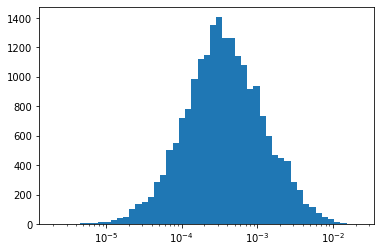

In [30]:
#min and max bounds of coeffs
emin = sorted(set(clustering.values()))[1]
emax = sorted(set(clustering.values()))[-1]

#construct bins
ebins = np.logspace(np.log10(emin),np.log10(emax),50)
plt.hist(clustering.values(),bins=ebins)
plt.xscale('log')

    




We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [33]:
visualize(DG)

(None, None)

In [34]:
from IPython.display import Image
img = 'Netwulf_L.png'
Image(url=img)